# Random Order- and SKU generators

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from datetime import datetime

%matplotlib inline

---

## Random SKU table generation

### Objectives
Generate a table with unique SKUs that have randomly generated values. The number of records can be chosen by the user.

The initial table must contain at minimum the following columns:

| SKU ID | Category | Length | Width | Height | Weight |
| ---- | ---- | ---- | ---- | ---- | ---- |
| categorical | categorical | numerical | numerical | numerical | numerical |

Goals in detail:
- Develop basic method to generate a table of randomly created SKUs with the above features

In [2]:
df_products = pd.read_excel('Product_list.xls')
df_products

,Category,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
0,Shirt,350,375,400,200,220,250,10,12,15
1,Pants,400,450,500,250,275,300,15,18,21
2,Socks,100,110,120,75,77,80,5,5,5
3,Box of cereals,250,250,250,150,150,150,10,10,10
4,Can of tuna,110,110,110,110,110,110,7,7,7
5,Bag of rice,540,540,540,350,350,350,250,250,250
6,Toolbox,600,600,600,380,380,380,350,350,350
7,Box of nails,150,150,150,120,120,120,80,80,80
8,Glue gun,380,380,380,80,80,80,80,80,80


In [3]:
df_products.set_index('Category', inplace=True)
df_products

,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
Category,,,,,,,,,
Shirt,350,375,400,200,220,250,10,12,15
Pants,400,450,500,250,275,300,15,18,21
Socks,100,110,120,75,77,80,5,5,5
Box of cereals,250,250,250,150,150,150,10,10,10
Can of tuna,110,110,110,110,110,110,7,7,7
Bag of rice,540,540,540,350,350,350,250,250,250
Toolbox,600,600,600,380,380,380,350,350,350
Box of nails,150,150,150,120,120,120,80,80,80
Glue gun,380,380,380,80,80,80,80,80,80


In [4]:
df_products.loc['Can of tuna']['Length_S']

110

In [5]:
def random_skus(articles, vertical):
    '''Function to generate a SKU table
    Inputs:
    - Number of desired SKUs
    - Market sector (vertical)
    Outputs:
    - SKU table'''
    
    random_dict = {}
    for i in range(1, articles + 1, 1):
        if vertical == 'Fashion':
            category = np.random.choice(['Shirt', 'Pants', 'Socks'])
            size = np.random.choice(['S', 'M', 'L'])
            length = abs(round(np.random.normal(df_products.loc[category]['Length_' + size], 10, 1)[0],0))
            width = abs(round(np.random.normal(df_products.loc[category]['Width_' + size], 7, 1)[0],0))
            height = abs(round(np.random.normal(df_products.loc[category]['Height_' + size], 5, 1)[0],0))
        elif vertical == 'Food':
            category = np.random.choice(['Box of cereals', 'Can of tuna', 'Bag of rice'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']
        else:
            category = np.random.choice(['Toolbox', 'Box of nails', 'Glue gun'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']

        size = np.random.choice(['S', 'M', 'L'])
        random_dict[i] = ['SKU_'+str(i), category, size, length, width, height]

    random_list = pd.DataFrame.from_dict(
        random_dict,
        orient='index',
        columns=['SKU', 'Category', 'Size', 'Length', 'Width', 'Height'])

    return random_list

In [6]:
df_skus_fashion = random_skus(1000, 'Fashion')

In [7]:
df_skus_fashion

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Shirt,M,378.0,212.0,10.0
2,SKU_2,Shirt,L,338.0,191.0,8.0
3,SKU_3,Socks,M,90.0,71.0,4.0
4,SKU_4,Socks,L,107.0,88.0,10.0
5,SKU_5,Socks,L,105.0,79.0,11.0
...,...,...,...,...,...,...
996,SKU_996,Shirt,M,374.0,219.0,14.0
997,SKU_997,Shirt,S,420.0,240.0,4.0
998,SKU_998,Pants,L,448.0,279.0,17.0
999,SKU_999,Pants,L,393.0,252.0,11.0


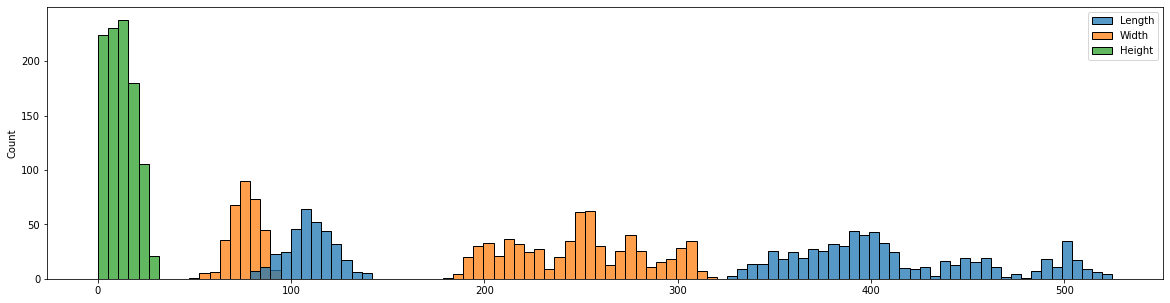

In [8]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_fashion[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


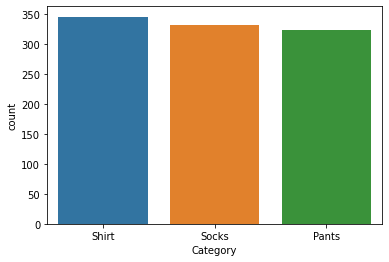

In [9]:
sns.countplot(df_skus_fashion['Category']);

In [10]:
df_skus_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       1000 non-null   object 
 1   Category  1000 non-null   object 
 2   Size      1000 non-null   object 
 3   Length    1000 non-null   float64
 4   Width     1000 non-null   float64
 5   Height    1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 87.0+ KB


In [11]:
df_skus_fashion.describe()

,Length,Width,Height
count,1000.000000,1000.000000,1000.000000
mean,311.574000,191.385000,11.827000
std,148.644313,86.115194,6.916857
min,80.000000,51.000000,0.000000
25%,118.000000,81.000000,6.000000
50%,375.000000,219.000000,11.000000
75%,412.000000,258.000000,17.000000
max,525.000000,316.000000,31.000000


In [12]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Can of tuna,S,110,110,7
2,SKU_2,Bag of rice,S,540,350,250
3,SKU_3,Can of tuna,S,110,110,7
4,SKU_4,Bag of rice,M,540,350,250
5,SKU_5,Box of cereals,S,250,150,10
...,...,...,...,...,...,...
996,SKU_996,Box of cereals,S,250,150,10
997,SKU_997,Can of tuna,S,110,110,7
998,SKU_998,Can of tuna,S,110,110,7
999,SKU_999,Can of tuna,L,110,110,7


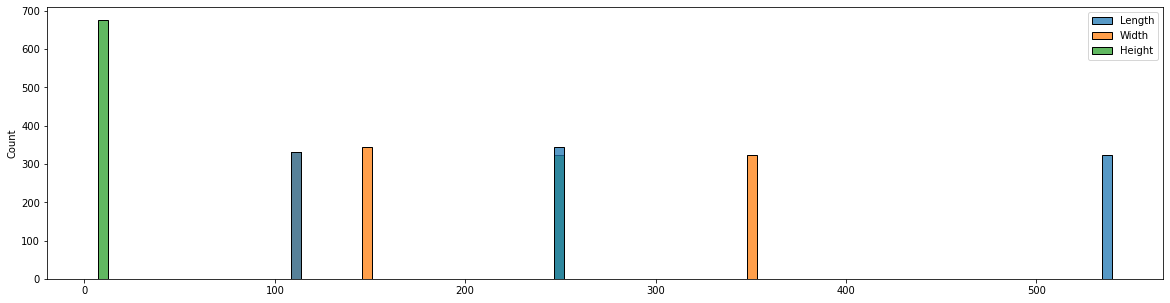

In [13]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


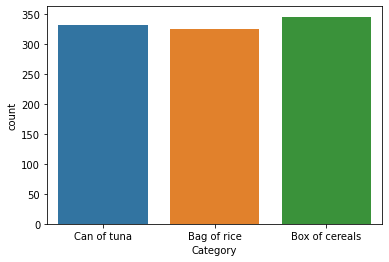

In [14]:
sns.countplot(df_skus_food['Category']);

### Notes
At this stage, the produced values are only to showcase the functionality and are not representative of real world data.
At a later time, more realistic data needs to be produced.

---

## Random order table generator

### Considerations
Like in most other ares in business, the SKU-velocity distribution in a typical order profil corresponds to an 80/20, or in some cases 70/30, ratio (20% of the SKUs representing 80% of the order volume.). Based on this, SKUs will belong to velocity classes (A, B, C), depending how fast they are moving. Therefore, the available SKUs need to be assigned orders in a way that follows this rule.

<img src="https://interlakemecalux.cdnwm.com/blog/img/80-20-pareto-principle.1.2.jpg" width="650"/>

There is a specific, somewhat business-specific, order profile (units per-order line and order lines per order).

Ultimately, there must be a seclection of order profiles that go in line with different market segments and business types.

### Objectives
The goal is to create a function that generates a table of random orders. The order profile (units per order line, order lines per order) as well as the volume distribution of the SKUs (Pareto principle) must represent a real live scenario and must be selectable by the user.

The initial table must contain at minimum the following columns:

| Date | Order ID | SKU ID | Quantity | Order category |
| ---- | ---- | ---- | ---- | ---- |
| numerical | categorical | categorical | numerical | categorical |

#### Steps in detail
1) Define range of days based on user input
2) Assign random number of orders to each day - for the beginning random, normal distribution
3) Develop basic functionality to assign for the above created orders a number of order lines (SKUs) - for the beginning random, normal, right skewed
4) Develop method to randomly distribute SKUs across all orders - for the beginning randomly, based on 80/20 rule
5) Add quantities for each order line - for now random, normal

---
#### 1. Define range of days

In [15]:
def day_definer(num):
    '''
    Function to create a list of days. First day of range is current day
    Input:
    - Number of days
    Outbout:
    - List of days in the range of first day to last day
    '''

    return pd.date_range(datetime.today(), periods=num).date.tolist()

In [19]:
lst_days = day_definer(90)
lst_days

[datetime.date(2022, 1, 23),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 26),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 29),
 datetime.date(2022, 1, 30),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 5),
 datetime.date(2022, 2, 6),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 12),
 datetime.date(2022, 2, 13),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 20),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 2, 24),
 datetime.date(2022, 2, 25),
 datetime.date(2022, 2,

#### 2. Assign random number of orders per day
Each day needs to get a number of orders assigned.

In [59]:
# Function to generate random oders for a given day

def order_generator(orders_per_day, avg_lines_order, order_std, min_order_size):

    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

In [60]:
test_orders = order_generator(1000, 30, 10, 3)

(array([ 1.,  1.,  1.,  0.,  1.,  3.,  3.,  2.,  3.,  6., 12.,  6.,  3.,
         8., 14., 15., 19., 18., 26., 24., 23., 30., 27., 28., 36., 37.,
        42., 34., 28., 34., 35., 38., 47., 43., 32., 32., 32., 32., 30.,
        22., 24., 24., 15., 22.,  9., 15., 12., 15.,  7.,  5.,  5.,  2.,
         4.,  2.,  1.,  1.,  5.,  1.,  1.,  2.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
        55., 56., 57., 58., 59., 60., 61., 62., 63.]),
 <BarContainer object of 60 artists>)

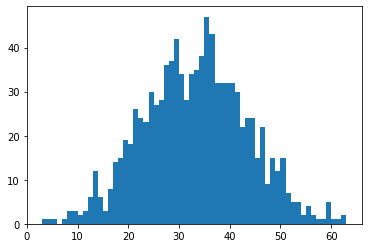

In [61]:
# Plot:
axis = np.arange(start=min(test_orders), stop = max(test_orders) + 1)
plt.hist(test_orders, bins = axis)

The number of orders per day is in this case 1000. This needs to be randomized as well when assigning orders for a range of days.

In [76]:
def order_generator(avg_orders_per_day, avg_lines_order, order_std, min_order_size):

    orders_per_day = np.round(abs(np.random.normal(loc=avg_orders_per_day, scale=50, size=1))).astype(int) # For simplicity, the standard deviation was set to 10
    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

In [77]:
test_orders = order_generator(1000, 30, 10, 3)

(array([ 1.,  0.,  0.,  0.,  1.,  4.,  4.,  1.,  2.,  5.,  6.,  3., 10.,
         5.,  8., 11., 10., 16., 12., 23., 24., 17., 35., 35., 28., 42.,
        39., 40., 24., 39., 35., 33., 37., 44., 43., 45., 24., 23., 23.,
        23., 23., 22., 12., 16., 15., 12., 11.,  5., 12.,  8.,  7.,  6.,
         3.,  2.,  5.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
        16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
        42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
        55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
        68., 69., 70.]),
 <BarContainer object of 67 artists>)

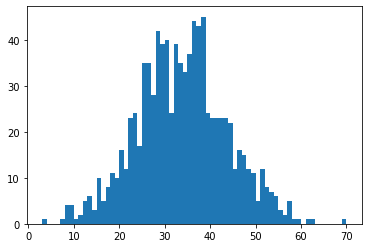

In [78]:
# Plot:
axis = np.arange(start=min(test_orders), stop = max(test_orders) + 1)
plt.hist(test_orders, bins = axis)

In [79]:
len(test_orders)

939

This works. Let's put all together in a dataframe.

In [ ]:
def order_generator(orders_per_day, avg_lines_order, order_std, min_order_size):

    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

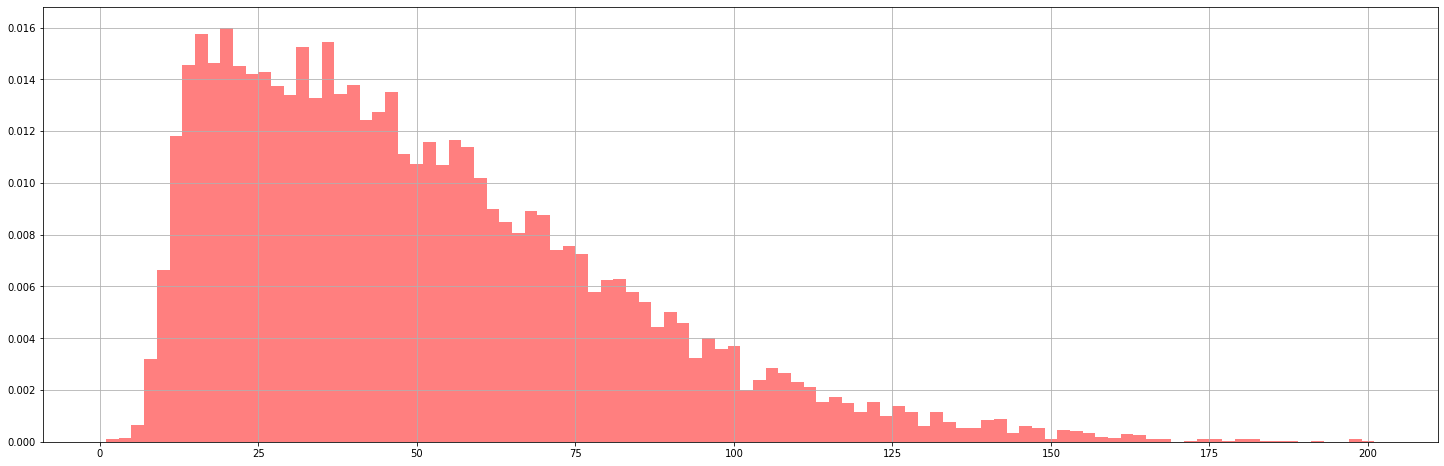

In [17]:
# Approach to develop a skewed dataset with "skewnorm"
n_orders = 10000
max_order_size = 200
skewness = 20   # Negative = left skewed, positive = right skewed

random_orders = skewnorm.rvs(a = skewness, loc=max_order_size, size=n_orders)

random_orders = random_orders - min(random_orders)     # Shift dataset to zero
random_orders = random_orders / max(random_orders)
random_orders = random_orders * max_order_size
random_orders = np.ceil(random_orders) + 1

# Check
plt.figure(figsize=(25, 8))
plt.hist(random_orders, 100, density=True, color='red', alpha=0.5)
plt.grid()

plt.show()

Each record in orders represents one order with an assigned size.

In [18]:
random_orders.min()

1.0